In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from packages import general, bh, fmm
from packages.general import pairwise

In [68]:
num_particles = 10

theta = 0.5
fmm_terms = 10

np.random.seed(0)

particles = [general.Particle(mass_like=True) for _ in range(num_particles)]
for p in particles:
    p.centre = p.centre / 5

pair_method = pairwise.Pairwise(particles)
bh_CoM = bh.BH(particles, theta, 0)
bh_multi = bh.BH(particles, theta, fmm_terms-1)
fmm_method = fmm.FMM(particles, fmm_terms)
print([p.centre for p in particles])

[(0.10976270078546495+0.1430378732744839j), (0.10897663659937937+0.08473095986778094j), (0.0875174422525385+0.17835460015641597j), (0.07668830376515554+0.15834500761653292j), (0.11360891221878647+0.1851193276585322j), (0.017425859940308142+0.0040436794880651435j), (0.1556313501899701+0.17400242964936383j), (0.15983171284334471+0.09229587245058637j), (0.023654885173786645+0.12798420426550478j), (0.1889337834099168+0.10436966435001434j)]


In [69]:
pair_method.do_method()
dir_pots  = np.array([p.potential for p in particles])
dir_force = np.array([p.force_per for p in particles])

In [70]:
bh_CoM.do_method()
bh_CoM_pots =  np.array([p.potential for p in particles])
bh_CoM_force = np.array([p.force_per for p in particles])
bh_multi.do_method()
bh_multi_pots =  np.array([p.potential for p in particles])
bh_multi_force = np.array([p.force_per for p in particles])
fmm_method.do_method()
fmm_pots =  np.array([p.potential for p in particles])
fmm_force = np.array([p.force_per for p in particles])

In [71]:
bh_CoM_pots_frac    = abs((bh_CoM_pots - dir_pots) / dir_pots)
bh_multi_pots_frac  = abs((bh_multi_pots - dir_pots) / dir_pots)
fmm_pots_frac       = abs((fmm_pots - dir_pots) / dir_pots)

dir_force_mag     = np.linalg.norm(dir_force, axis=1)
dir_force_angle   = np.arctan2(dir_force[:,1], dir_force[:,0])
bh_CoM_force_mag     = np.linalg.norm(bh_CoM_force, axis=1)
bh_CoM_force_angle   = np.arctan2(bh_CoM_force[:,1], bh_CoM_force[:,0])
bh_multi_force_mag   = np.linalg.norm(bh_multi_force, axis=1)
bh_multi_force_angle = np.arctan2(bh_multi_force[:,1], bh_multi_force[:,0])
fmm_force_mag        = np.linalg.norm(fmm_force, axis=1)
fmm_force_angle      = np.arctan2(fmm_force[:,1], fmm_force[:,0])

bh_CoM_force_mag_frac   = abs((bh_CoM_force_mag - dir_force_mag) / dir_force_mag)
bh_multi_force_mag_frac = abs((bh_multi_force_mag - dir_force_mag) / dir_force_mag)
fmm_force_mag_frac      = abs((fmm_force_mag - dir_force_mag) / dir_force_mag)

delta = abs(bh_CoM_force_angle - dir_force_angle)   % (2*np.pi)
bh_CoM_force_angle_frac   = np.minimum(delta, 2*np.pi - delta) / 2*np.pi
delta = abs(bh_multi_force_angle - dir_force_angle) % (2*np.pi)
bh_multi_force_angle_frac = np.minimum(delta, 2*np.pi - delta) / 2*np.pi
delta = abs(fmm_force_angle - dir_force_angle)      % (2*np.pi)
fmm_force_angle_frac      = np.minimum(delta, 2*np.pi - delta) / 2*np.pi

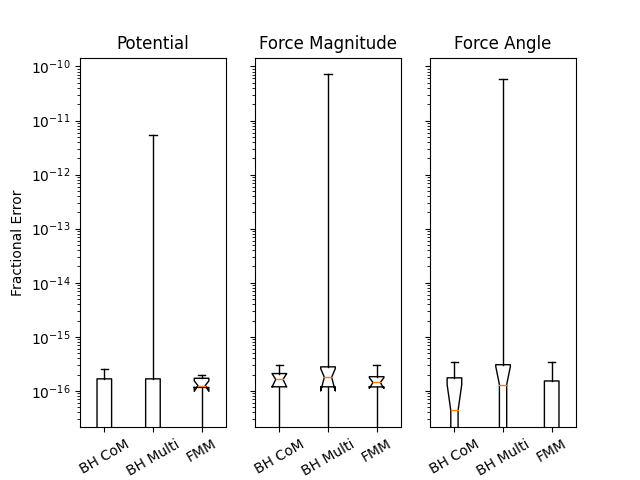

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey='all')

data_pots = [
    bh_CoM_pots_frac,
    bh_multi_pots_frac,
    fmm_pots_frac,
]
data_mag = [
    bh_CoM_force_mag_frac,
    bh_multi_force_mag_frac,
    fmm_force_mag_frac,
]
data_angle = [
    bh_CoM_force_angle_frac,
    bh_multi_force_angle_frac,
    fmm_force_angle_frac,
]

x_labels = [
    'BH CoM',
    'BH Multi',
    'FMM',
]

ax1.boxplot(data_pots,  notch=True, whis=(0,100))
ax2.boxplot(data_mag,   notch=True, whis=(0,100))
ax3.boxplot(data_angle, notch=True, whis=(0,100))

ax1.set_yscale('log')
ax1.set_ylabel('Fractional Error')
ax1.set_xticklabels(x_labels, rotation=30)
ax2.set_xticklabels(x_labels, rotation=30)
ax3.set_xticklabels(x_labels, rotation=30)
ax1.set_title('Potential')
ax2.set_title('Force Magnitude')
ax3.set_title('Force Angle');